In [26]:
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns


# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")

df = dataset['train'].to_pandas()


# Data Cleanup
df['job_posted_date']= pd.to_datetime(df["job_posted_date"])
df['job_skills']= df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [27]:
df_US = df[(df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

In [28]:
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()

In [29]:
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [30]:
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

In [31]:
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

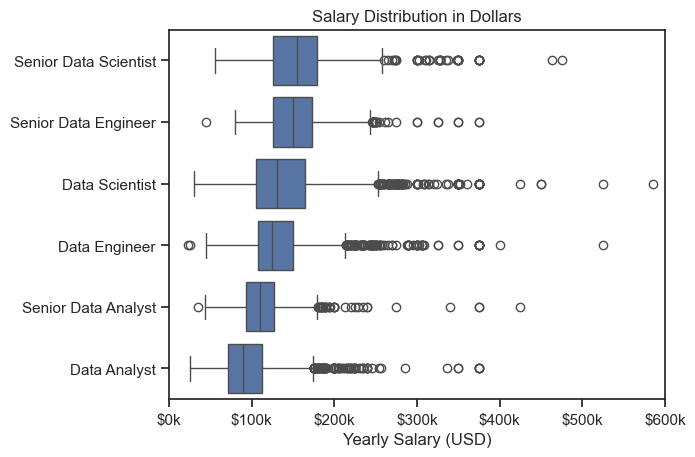

In [32]:
sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', order=job_order)

sns.set_theme(style='ticks')
#this is all the same

plt.title('Salary Distribution in Dollars')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0,600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

Investigate Median Salary Vs Skill for Data Analyst

In [33]:
df_DA_US = df[(df['job_title_short'] =='Data Analyst') & (df['job_country'] =='United States')].copy()


df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [35]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [47]:
df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median',ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [41]:
df_DA_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median',ascending=False)

df_DA_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


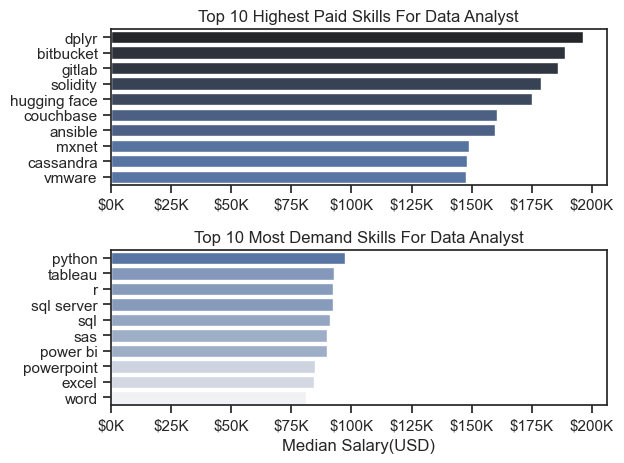

In [48]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style='ticks')


sns.barplot(data=df_DA_top_pay, x= 'median', y=df_DA_top_pay.index, ax=ax[0],hue= 'median', palette= 'dark:b_r')
ax[0].legend().remove()
#df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)

ax[0].set_title('Top 10 Highest Paid Skills For Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int (x/1000)}K'))





sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1],hue= 'median', palette= 'light:b')
ax[1].legend().remove()
#df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)

ax[1].set_title('Top 10 Most Demand Skills For Data Analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary(USD)')


ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int (x/1000)}K'))


fig.tight_layout()
plt.show()